<font face="Bookman Old Style"><font size="4"><b>Question</b><br>
    <font size="3"> Apply the dimensionality reduction techniques on your dataset and find out the optimal features that can contribute in the modelling.

<font face="Bookman Old Style"><font size="4"><b>Feature Selection</b><br>
    <font size="3">- The input variables that we give to our machine learning models are called features<br>- To train an optimal model, we need to make sure that we use only the essential features.<br>- The method of choosing the important parameters of our data is called Feature Selection. <br>- Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.decomposition import PCA
from sklearn.decomposition import *
from sklearn.preprocessing import StandardScaler


Bad key text.latex.preview in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
# Reading the dataset
data = pd.read_csv("C:/Users/Prerana Murthy/Documents/Christ/MSc/SEM 2/Machine learning/cancer_data.csv")
data

,cancer_type,new_cases_number,new_cases_rank,new_case_percent,new_cases_cum_risk,Deaths Number,death_rank,death_percentage,Deaths_cum_risk,risk_of_prevalence_5yr,per100k_5yr_prevalence
0,Anus,5452,30,0.41,0.05,2776,29,0.33,0.03,12278,0.89
1,Bladder,21096,17,1.60,0.19,11154,21,1.30,0.10,49257,3.57
2,"Brain, central nervous system",31460,14,2.40,0.22,26656,10,3.10,0.20,74398,5.39
3,Breast,178361,1,13.50,2.81,90408,1,10.60,1.49,459271,69.28
4,Cervix uteri,123907,3,9.40,2.01,77348,2,9.10,1.30,283842,42.82
5,Colon,31646,13,2.40,0.28,19236,13,2.30,0.17,65493,4.75
6,Corpus uteri,16413,22,1.20,0.29,6385,23,0.75,0.11,43484,6.56
7,Gallbladder,19570,20,1.50,0.17,14736,16,1.70,0.13,25138,1.82
8,Hodgkin lymphoma,9221,26,0.70,0.06,3513,28,0.41,0.03,24928,1.81
9,Hypopharynx,28489,15,2.20,0.26,11443,20,1.30,0.11,39750,2.88


In [3]:
del data['cancer_type']

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data)

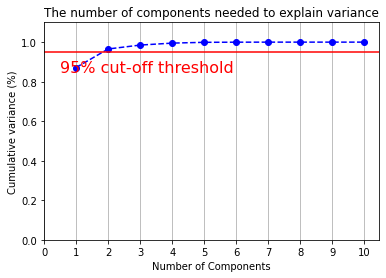

In [5]:
pca = PCA().fit(data_rescaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [6]:
import pandas as pd
X = data_rescaled

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

print("Eigenvalues:")
print(pca.explained_variance_)
print()
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()
print("EigenVectors")
print(pca.components_)

Eigenvalues:
[9.03316096 0.90778286]

Variances (Percentage):
[87.75070648  8.81846212]

EigenVectors
[[ 0.33378722 -0.28714265  0.33380116  0.31926634  0.32583549 -0.28639491
   0.32561444  0.32620624  0.3191827   0.30046182]
 [ 0.06602873  0.5094964   0.06601327  0.31252441 -0.17183584  0.52887323
  -0.17432205  0.1455121   0.25973352  0.4536149 ]]


In [7]:
transformed_df = pd.DataFrame(pca.transform(X_scaled), 
                              columns=['PC1', 'PC2'])
transformed_df.to_csv("cancer_new.csv", index=False)

In [8]:
transformed_df

,PC1,PC2
0,-2.398535,0.693311
1,-0.976944,-0.142719
2,0.253200,-0.860824
3,10.595251,2.886663
4,7.393696,1.107889
5,-0.032687,-0.679279
6,-1.271485,0.412175
7,-0.955947,-0.433576
8,-2.102831,0.514515
9,-0.756620,-0.279326


Text(0.5, 1.0, 'Correlation between different fearures')

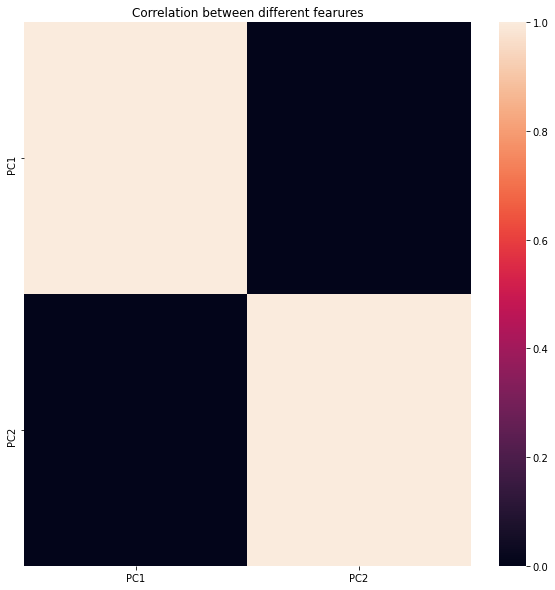

In [9]:
correlation1 = transformed_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation1)

plt.title('Correlation between different fearures')